In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 15 and 16

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:6}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chloezandberg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chloezandberg/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "Artificial Intelligence", "Deep learning", "Unsupervised learning", "Quantum Computing", 
    "Environmental protection", "Climate Change", "Renewable Energy", "Biodiversity",
    "French Cuisine", "Bread food", "Dumpling food"
]


wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17
7,Biodiversity,It can be measured on various levels.,8
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

I would make three clusters: food, environmental science, and computing science. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

random_state=42

cv = CountVectorizer()
X = cv.fit_transform(wiki_df['text'])

km = KMeans(random_state=42, n_clusters = 3)

km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [6]:
X.shape

(11, 156)

In [7]:
kmeans_bow_labels = km.labels_
kmeans_bow_labels

array([2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
wiki_df["bow_kmeans"] = kmeans_bow_labels
wiki_df

,wiki query,text,n_words,bow_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1
7,Biodiversity,It can be measured on various levels.,8,1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [9]:
import sys
print(sys.path)

['/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python312.zip', '/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12', '/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/lib-dynload', '', '/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages']


In [10]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

# If this cell gives an error, try updating transformers with
# pip install transformers -U

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [11]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.102875,0.201959,0.044091,0.281749,0.321483,-0.281129,0.042515,0.083172,0.155722,-0.114267,...,0.310224,-0.141896,-0.153256,-0.058627,0.005015,-0.005808,0.630392,-0.023694,-0.071899,-0.115921
1,0.000321,0.428834,0.152297,-0.161278,0.224354,-0.363829,0.110951,0.042096,0.188454,0.188299,...,-0.092608,-0.117086,0.133018,0.207266,-0.395182,0.085347,0.677385,-0.405456,0.092258,-0.100412
2,0.236465,-0.282463,-0.258300,0.300584,0.234606,0.061745,-0.072744,0.045550,0.271853,0.054201,...,0.531341,-0.095102,0.316028,0.170600,-0.213746,0.110625,0.463023,-0.658667,0.246860,0.171115
3,0.276844,0.657946,0.106465,0.290567,0.803929,0.023764,0.136675,-0.030062,0.115825,0.244902,...,0.069148,-0.183727,0.217584,0.140797,-0.216237,0.128014,0.181907,-0.054304,0.131838,-0.016249
4,0.200327,0.157552,0.093484,0.120533,-0.439307,0.148568,-0.003543,-0.211189,-0.006088,-0.102895,...,0.187549,-0.430333,-0.350163,0.251643,0.115399,-0.053311,0.088484,0.307341,0.355386,0.024684
5,0.189105,0.406864,0.172560,0.273777,0.058933,0.224641,-0.056591,-0.242728,0.056221,0.127506,...,0.099108,-0.350095,0.070398,0.469786,0.003972,-0.130359,-0.105738,-0.091219,0.210350,0.072002
6,-0.066224,0.465511,-0.135840,-0.229255,-0.144745,0.013771,-0.122810,-0.172321,-0.278583,0.002541,...,-0.090149,-0.305185,-0.048772,-0.008466,0.145859,-0.153741,0.012771,0.507823,0.239723,0.015132
7,-0.139882,0.207130,-0.127447,0.214821,-0.099096,0.063319,-0.347633,-0.203128,0.325749,0.624157,...,0.311010,-0.036291,0.004326,0.078006,0.321024,-0.180906,0.553141,-0.010740,0.382759,0.032368
8,-0.112771,-0.259073,0.172584,-0.149188,-0.074585,0.222288,-0.213039,0.512004,0.216943,-0.200930,...,0.083372,0.196123,0.030323,-0.308584,0.061457,-0.008511,0.350081,0.456677,-0.352978,-0.053868
9,-0.022418,0.217159,0.022694,0.003616,0.240856,0.358046,-0.053310,-0.328075,0.190012,0.244470,...,0.265412,-0.415595,0.003036,0.052483,0.345946,0.110091,0.405441,0.197792,-0.058254,0.212377


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [12]:
km = KMeans(random_state = random_state, n_clusters =3)

km.fit(emb_sent_df)

KMeans(n_clusters=3, random_state=42)

In [13]:
kmeans_emb_labels = km.labels_

In [14]:
wiki_df["emb_kmeans"] = kmeans_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0
7,Biodiversity,It can be measured on various levels.,8,1,2
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(metric='cosine', eps = 0.65, min_samples = 3)

In [16]:
db.fit(emb_sents)

DBSCAN(eps=0.65, metric='cosine', min_samples=3)

In [17]:
dbscan_emb_labels = db.labels_

In [18]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,-1
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,1
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,1
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,1
7,Biodiversity,It can be measured on various levels.,8,1,2,-1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2,-1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,-1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

Text(0.5, 1.0, 'Dendrogram for sentence-embedded sentences (complete linkage)')

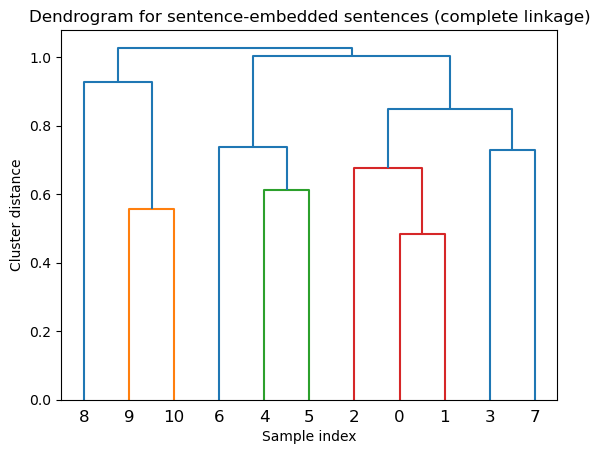

In [19]:
from scipy.cluster.hierarchy import linkage, complete, fcluster, dendrogram

# code adopted from lecture video 15.3 

Z = linkage(emb_sents, method='complete', metric='cosine')

dendro = dendrogram(Z)
dendro
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");
plt.title('Dendrogram for sentence-embedded sentences (complete linkage)')

In [20]:
hier_emb_labels = fcluster(Z, 3, criterion = 'maxclust')

In [21]:
# hier_emb_labels = fcluster(Z, 3, criterion="maxclust") # alternative solution

In [22]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0,3
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0,3
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0,3
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,-1,3
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,1,2
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,1,2
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,1,2
7,Biodiversity,It can be measured on various levels.,8,1,2,-1,3
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,2,-1,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,-1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

Input representation is critical in clustering, as seen with the improvement in clustering with the advent of sentence-embedding versus bag of words embedding. Additionally, the Wikipedia queries that represent each label must be representative of the label they are supposed to represent—in the case of Biodiversity in our above data frame, the query representing it is not an obvious description of its label, and therefore fails to be clustered appropriately. The clustering results, for the most part, matched my intuitions with the exception of Biodiversity, as previously mentioned. Tuning the hyperparameters associated with each clustering method is the biggest challenge in finding appropriate clusters, as algorithms like DBSCAN can be tricky (especially where setting the number of clusters is not an explicit hyperparameter in the case of this problem where we know how many clusters we would like to set). Hierarchical clustering presents challenges in deciding which linkage criteria is best for the use case. In this case, I would say hierarchical clustering resulting in clusters that matched my intuitions, where the other methods did not. K-Means is difficult as it is prone to unlucky initialization (so, despite having control of the number of clusters, the clustering we expect is not guaranteed).

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [23]:
import umap

In [24]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


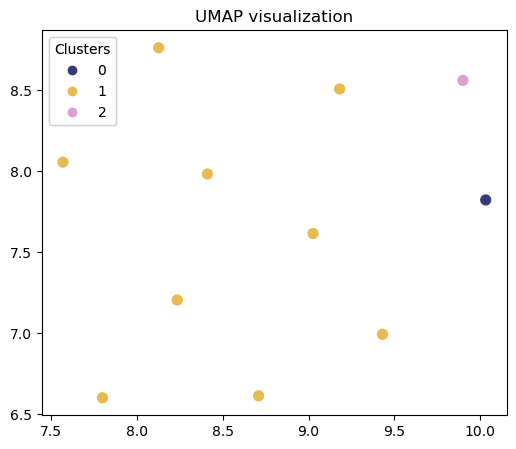

In [25]:
plot_umap_clusters(data = X, cluster_labels=list(wiki_df['bow_kmeans']))

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


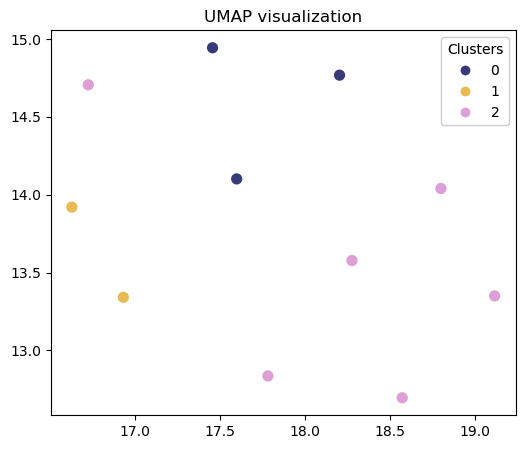

In [26]:
plot_umap_clusters(data = emb_sents, cluster_labels=list(wiki_df['emb_kmeans']))

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


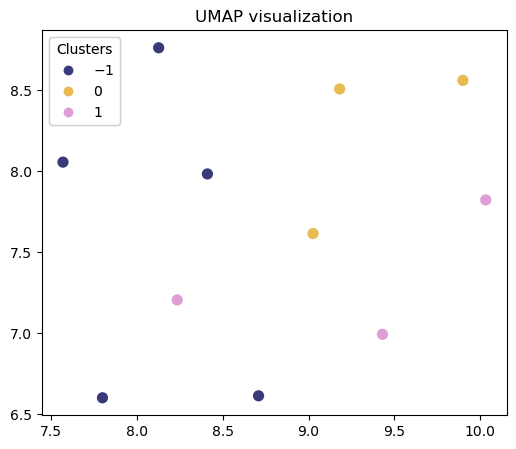

In [27]:
plot_umap_clusters(data = X, cluster_labels=list(wiki_df['emb_dbscan']))

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


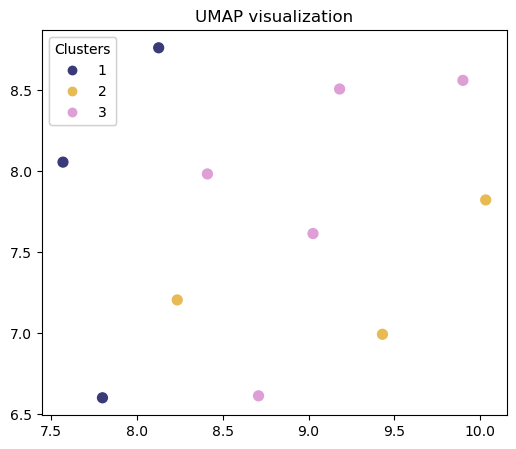

In [28]:
plot_umap_clusters(data = X, cluster_labels=list(wiki_df['emb_hierarchical']))

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [29]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(16616, 12)

In [30]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [31]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(871, 12)

In [32]:
recipes_df["name"]

42       i yam what i yam  muffins        
101      to your health  muffins          
133      500 margarita bread              
137      lplermagrone  herdsman s macaroni
138      lplermagronen                    
             ...                          
16495    banana cream protein pie         
16520    banana cupcakes                  
16575    banana foster martini            
16576    banana foster trifle             
16606    banana half wheat pancakes       
Name: name, Length: 871, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [33]:
shortest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmin(), 'name']
longest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmax(), 'name']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

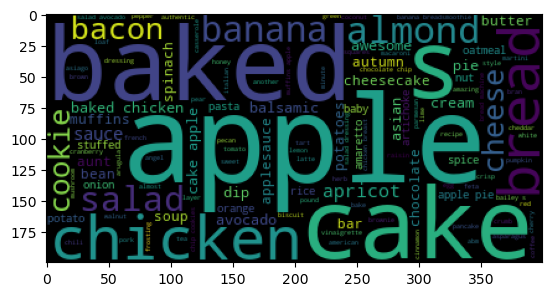

In [34]:
from wordcloud import WordCloud

wc=WordCloud()

text = ' '.join(recipes_df['name'])

cloud = wc.generate(text)

plt.imshow(cloud)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [35]:
embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")
emb_sents = embedder.encode(recipes_df["name"].tolist())
embeddings = pd.DataFrame(emb_sents, index=recipes_df.index)
embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
42,-0.333475,0.227865,-0.307339,0.410549,0.917104,-0.345507,0.305810,0.256676,-0.147711,0.040727,...,-0.053024,-0.209463,0.362419,-0.246085,0.208379,-0.024875,0.506561,0.197738,-0.386422,-0.002183
101,-0.024523,0.246222,-0.055709,0.358273,0.454786,-0.088054,0.260368,0.231947,0.093013,-0.007835,...,0.144860,-0.435459,0.208343,-0.002655,-0.081200,-0.130489,0.452378,0.186310,-0.278500,0.028580
133,0.017761,-0.041203,0.264461,0.605175,0.320924,-0.091643,0.126561,0.111143,0.246911,0.088033,...,-0.187993,0.084441,0.696996,0.197375,0.451682,0.130828,0.167891,0.481562,-0.013234,-0.138988
137,-0.340603,0.225288,0.367721,0.249019,0.374547,0.256833,0.223553,0.250370,0.234003,-0.334590,...,0.054044,0.092130,0.116261,0.243931,0.072788,-0.060637,0.382107,-0.195160,-0.426723,0.277656
138,-0.168002,-0.219218,0.330761,0.302195,-0.173168,0.204557,0.192389,0.140975,0.303173,0.038062,...,0.019095,-0.002448,0.437832,0.563785,0.033442,0.187658,0.529252,-0.233786,0.509932,0.410715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,0.202935,-0.313725,0.048643,0.122575,0.544419,-0.331978,-0.063120,0.577312,-0.683885,0.041578,...,0.039726,0.050344,0.540322,0.226567,0.220758,0.204755,0.277207,0.226949,-0.131715,0.101234
16520,-0.025232,0.107778,0.101162,0.450369,0.672277,-0.192065,-0.103924,0.447535,-0.193593,-0.024150,...,-0.098297,-0.164220,0.311860,0.254397,0.057501,0.165054,-0.156499,0.039224,-0.247077,0.179194
16575,-0.079203,0.214274,0.238676,0.747576,0.087323,0.036813,0.301766,0.419604,-0.115502,-0.145116,...,0.209571,-0.083020,0.213681,0.149970,-0.113437,0.179168,0.523796,0.353127,-0.411993,0.390710
16576,0.313706,0.435845,0.023619,0.437547,-0.345592,-0.627262,0.210069,0.239257,0.209280,0.206811,...,0.181411,-0.155753,0.377954,0.398284,0.076323,0.448615,0.906848,0.348146,-0.146494,0.424703


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [36]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

I first attempted to use an elbow plot to pick the number of clusters for my K-Means clustering. However, there was no obvious elbow that allowed for an obvious number of clusters using this method. I used the elbow plot, however, to inform the number of clusters I visualized using a Silhouette plot to better determine which number of clusters would be best.

I have adapted some of the following code from Lecture 15.

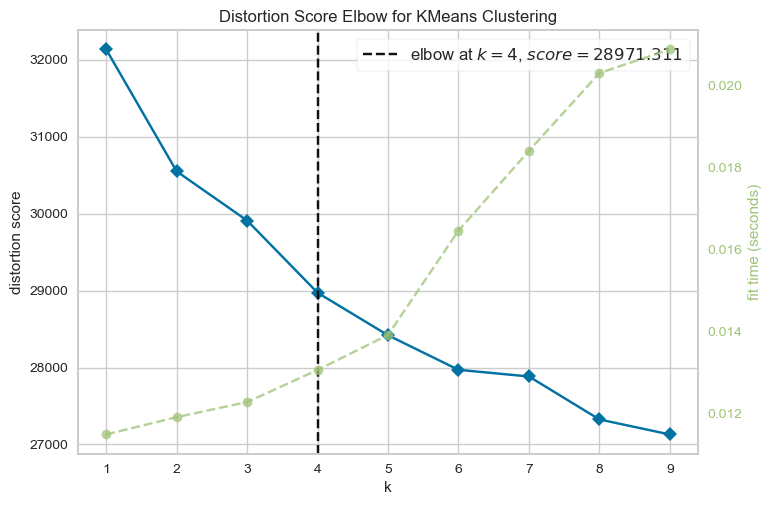

In [37]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(n_init='auto', random_state=random_state)
visualizer = KElbowVisualizer(km, k=(1, 10))

visualizer.fit(embeddings) 
visualizer.show();

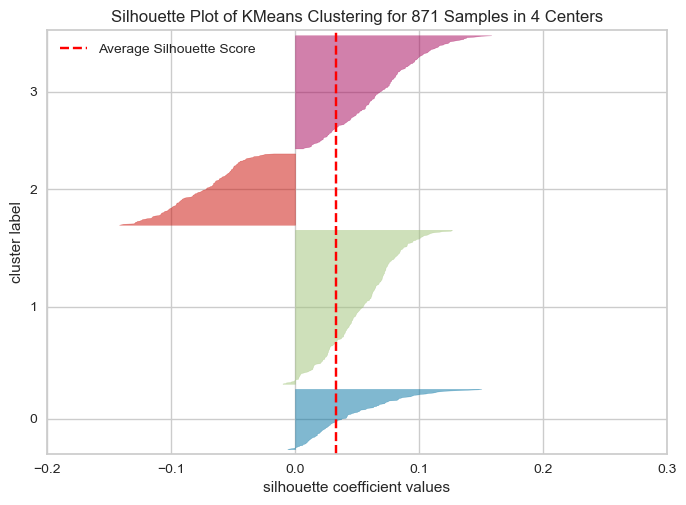

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, n_init='auto', random_state=random_state)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(embeddings)
visualizer.show();

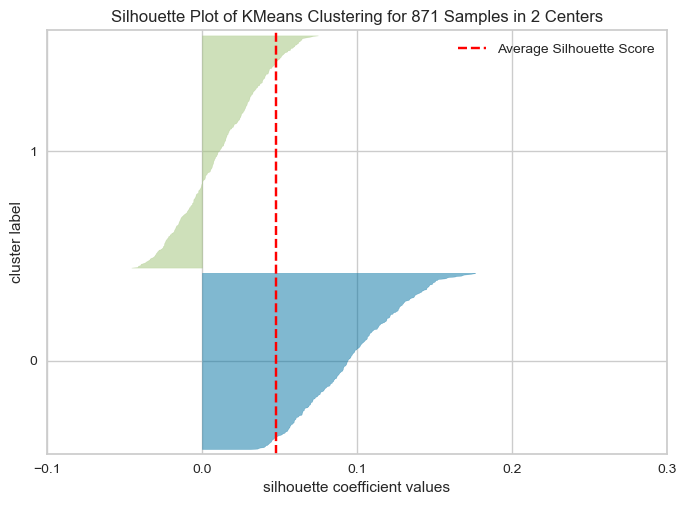

In [39]:
model = KMeans(2, n_init='auto', random_state=random_state)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(embeddings)
visualizer.show();

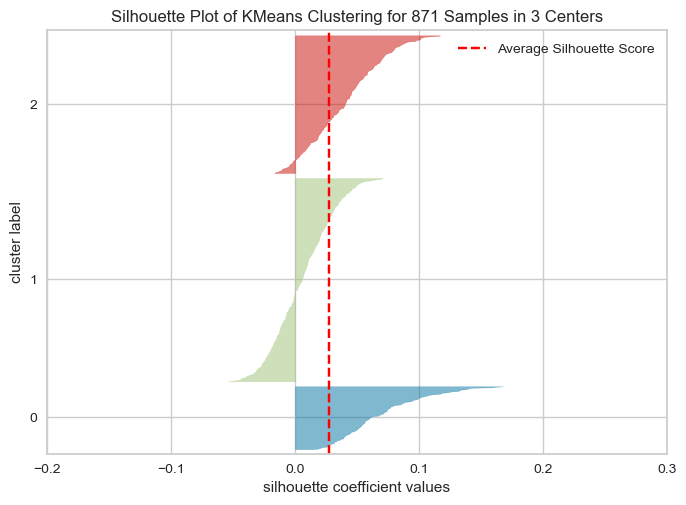

In [40]:
model = KMeans(3, n_init='auto', random_state=random_state)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(embeddings)
visualizer.show();

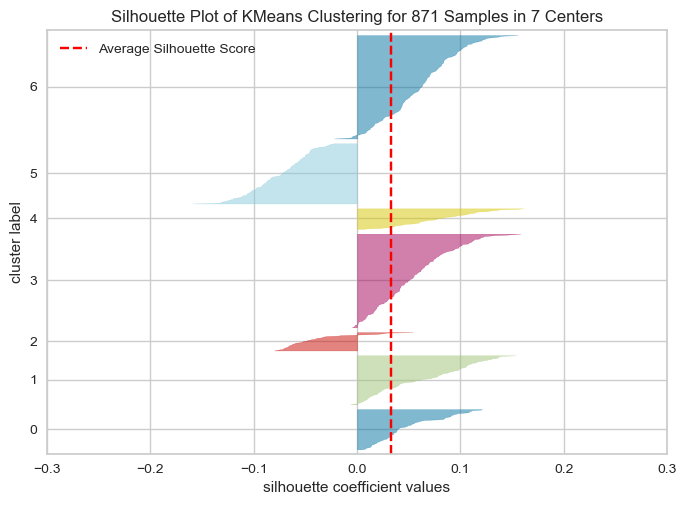

In [41]:
model = KMeans(7, n_init='auto', random_state=random_state)
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(embeddings)
visualizer.show();

While none of these models are particularly optimal, as most silhouette plots have an entire cluster or half of a cluster with negative silhouette values, indicating these points are better fit to another cluster than the one currently assigned to, it seems that 2 or 3 clusters may be optimal. These are the only plots that don't have an entire cluster that appears to belong to another (a cluster with entirely negative silhouette coefficient values). I will go with 2 clusters.

In [42]:
km = KMeans(n_clusters =2, random_state=random_state)

km.fit(embeddings)

km_labels = km.labels_

recipes_df['km_cluster'] = km_labels

In [43]:
print_clusters(recipes_df, km_labels, n_recipes=10, replace=False, random_state=random_state)

Cluster 0
----------
1 2 3 4 cake  orange
adirondack applesauce and date bars
aunt jemima cornbread
bailey s flourless peanut butter cookies
baked buttery potato slices
amish sourdough cinnamon bread starter and bread instructions
applesauce oatmeal cookies
apple surprise
another angel yeast biscuit
adult chocolate milk



Cluster 1
----------
absolutely delightful scalloped potatoes
30 minute white bean and tomato soup
amish bread ii
baked crisp parmesan romano chicken
aloo rasdar   indian potato in gravy ala rukshana
baked ritzed pork chops
not your average spuds
avocado and pinto bean salad
amarula delight
bacon buttermilk dressing for spinach salad





<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

Below I try to tune multiple hyper-parameters across different values of epsilon and minimum neighbouring samples used for classification. None of these hyper-parameters resulted in meaningful clustering according to the Silhouette method: the average Silhouette score for even the best performing combination of hyper-parameters is 0.1 (which was ``eps=0.50`` and ``min_samples=3``. What is misleading is the ``print_clusters`` function appears to say that all points with these best hyper-parameters are all classified under the same cluster. In this sense, this data set appears to be too dense to be meaningfully grouped by DBSCAN. A density method here is not appropriate to use for clustering according to my experimentation below.

Some of the code below is adapted from Lecture 16.

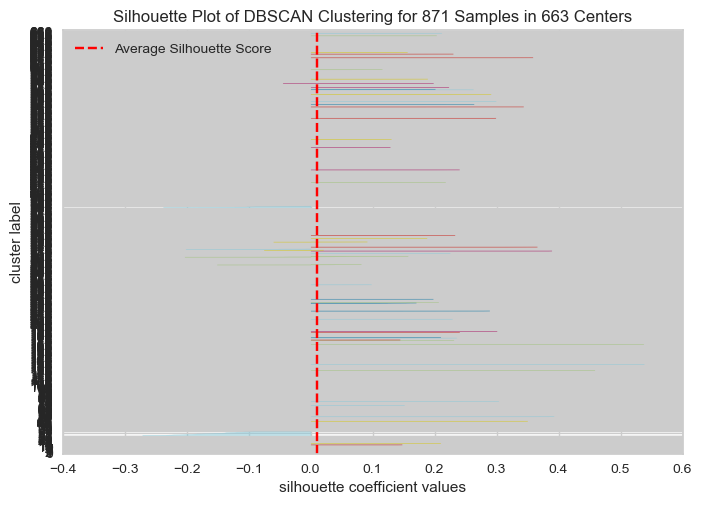

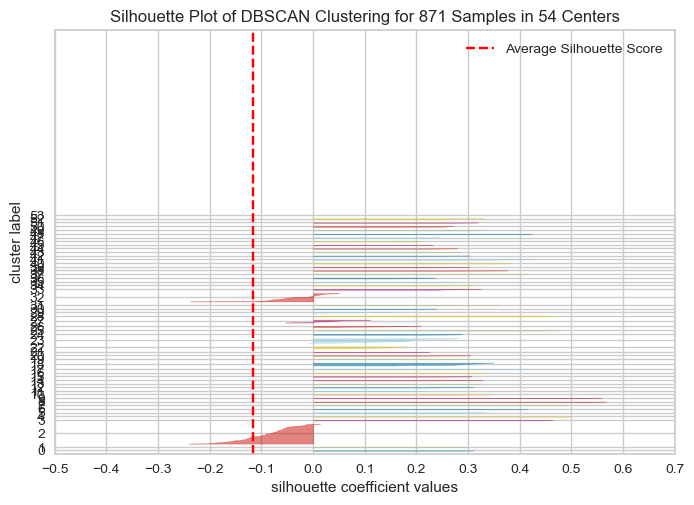

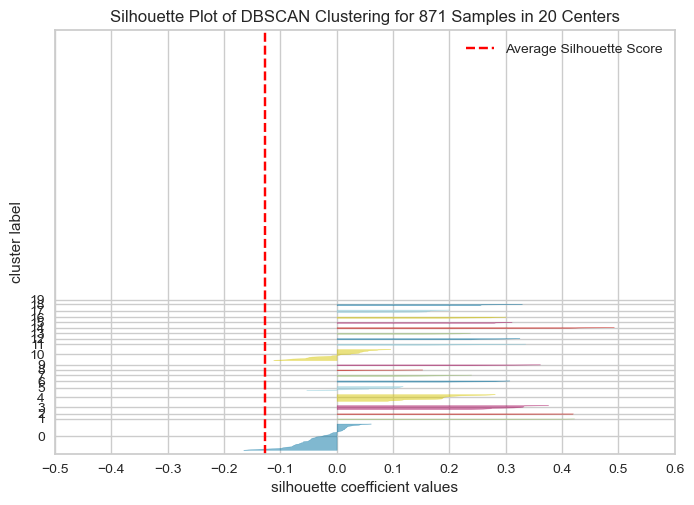

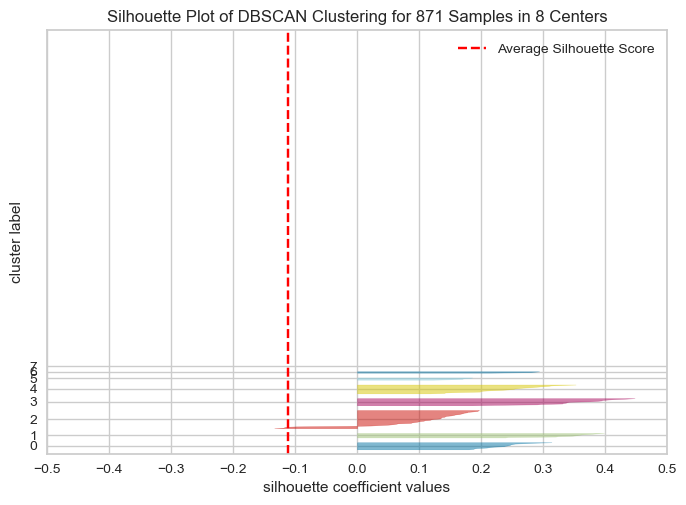

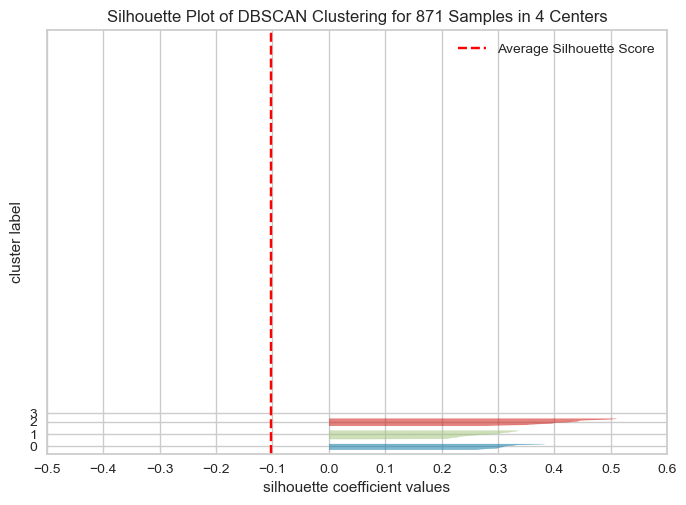

Skipping eps=0.25, min_samples=15 due to insufficient clusters.


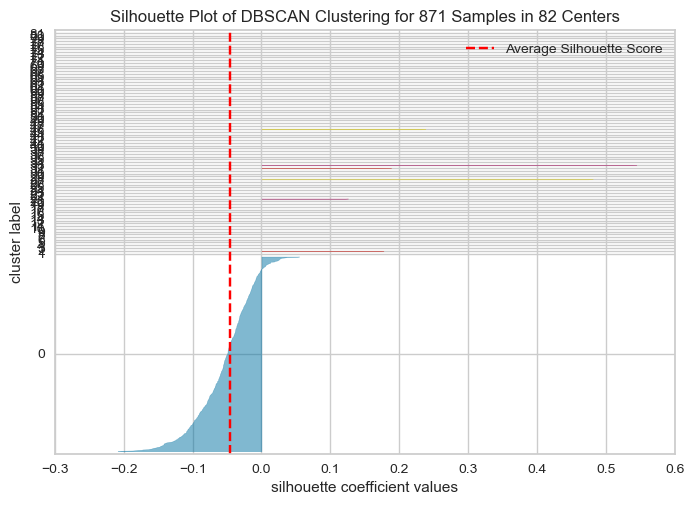

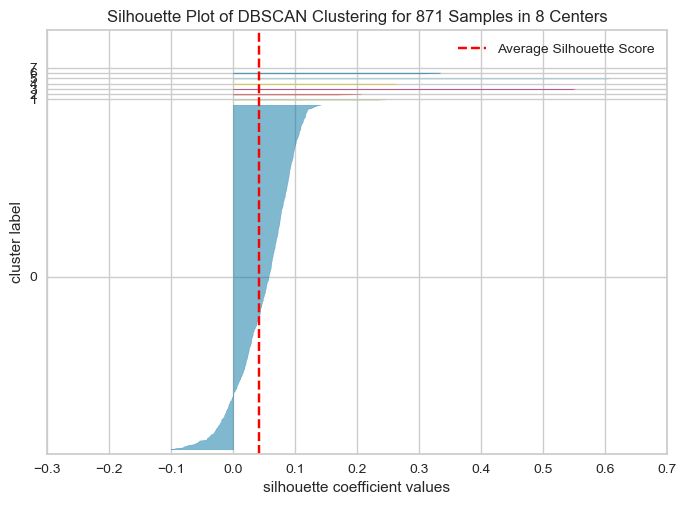

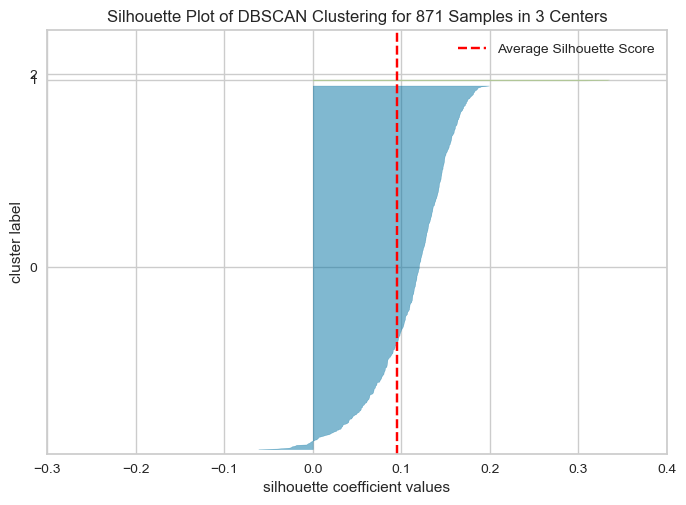

Skipping eps=0.5, min_samples=5 due to insufficient clusters.
Skipping eps=0.5, min_samples=12 due to insufficient clusters.
Skipping eps=0.5, min_samples=15 due to insufficient clusters.
Skipping eps=0.75, min_samples=1 due to insufficient clusters.
Skipping eps=0.75, min_samples=2 due to insufficient clusters.
Skipping eps=0.75, min_samples=3 due to insufficient clusters.
Skipping eps=0.75, min_samples=5 due to insufficient clusters.
Skipping eps=0.75, min_samples=12 due to insufficient clusters.
Skipping eps=0.75, min_samples=15 due to insufficient clusters.


In [46]:
eps_vals = [0.25, 0.50, 0.75]
min_samples_vals = [1, 2, 3, 5, 12, 15]

for eps in eps_vals:
    for min_samples in min_samples_vals:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        dbscan.fit(embeddings)
        n_clusters = len(set(dbscan.labels_))
        dbscan.n_clusters = n_clusters
        dbscan.predict = lambda x: dbscan.labels_

        
       # check if the number of unique labels is valid for Silhouette analysis
        n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        
        if n_clusters > 1:  # only proceed if there are at least two clusters
            visualizer = SilhouetteVisualizer(dbscan, colors="yellowbrick")
            visualizer.fit(embeddings)
            visualizer.show()
        else:
            print(f"Skipping eps={eps}, min_samples={min_samples} due to insufficient clusters.")

In [60]:
db = DBSCAN(eps=0.5, min_samples = 3, metric='cosine')

db.fit(embeddings)

dbscan_labels = dbscan.labels_

In [61]:
print_clusters(recipes_df, dbscan_labels, n_recipes=10, replace=False, random_state=None)

Cluster 0
----------
apple pound cake
apple crisp with pecans and oats
avocado and prawn shrimp salad
a honey of a honey cake
bacon buttermilk dressing for spinach salad
7 layer ranch dip
autumn pumpkin spice pancakes
apple topped cake
aunt virgie s stuffed green bell peppers
apple cider gingerbread





<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

Text(0.5, 1.0, 'Dendrogram for sentence-embedded sentences (single linkage)')

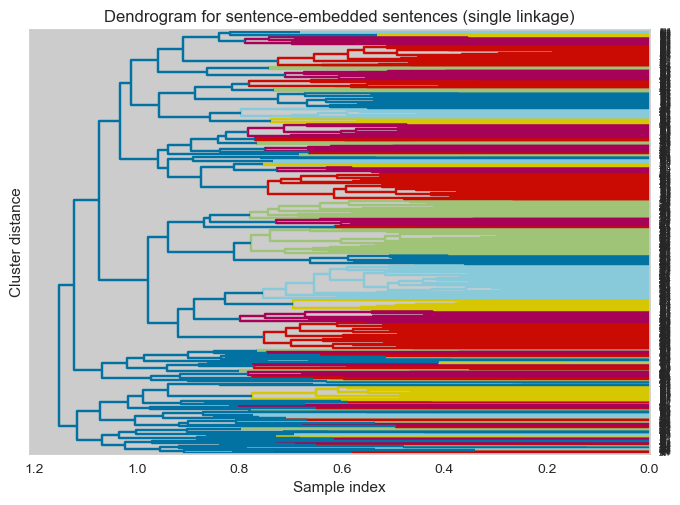

In [47]:
# code adopted from lecture video 15.3 

Z = linkage(embeddings, method='complete', metric='cosine')

dendro = dendrogram(Z, orientation='left')
dendro
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");
plt.title('Dendrogram for sentence-embedded sentences (single linkage)')

In [48]:
hier_labels = fcluster(Z, 2, criterion = 'maxclust')

In [49]:
recipes_df['hier_cluster'] = hier_labels

In [50]:
print_clusters(recipes_df, hier_labels, n_recipes=10, replace=False, random_state=None)

Cluster 1
----------
apricot angel brownies
500 margarita bread
5 cup ambrosia
almost famous chimichangas
7 layer elote dip
4h winning white bread  non bread machine
amarula coffee
ace of spades
banana berry bread
17 twist



Cluster 2
----------
apricot dijon chicken
abs diet ultimate power smoothie
baked chicken with onions
avocado and prawn shrimp salad
baked brie with walnut bourbon crust
aloha  albacore tuna salad
apple pear rum crisp
bacardi peach red mojito
4 foil wrapped dinners
baked ranch parmesan chicken





<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

``KMeans`` appears to have grouped recipes by dessert/sweets and main/appetizers. ``DBSCAN`` wasn't able to produce any meaningful groups, perhaps because the sentence embedding of these recipes are so dense. Hierarchical clustering appears to have made more arbitrary groupings so I'm really grasping at straws trying to organize these clusters, but it appears to be sweeter/fruitier dishes and more savory dishes. However, these common themes are not strict as there are exceptions across the clusters. I think ``KMeans`` was better at making a clearer distinction in terms of overarching theme between the two clusters than hierarchical clustering. ``DBSCAN`` really only should be used when we know density plays a defining factor in the distribution of the data points. The algorithms behind the clustering methods really do impact how clustering plays out and this is evident in the results of this clustering exercise.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)